In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
# We will be previewing images alongthe way, so lets create a function
def previewImg(text,img_preview,grayscale=False):
    #plt.imshow(img_preview)
    if grayscale==False:
        #convert a color image from BGR to RGB before previewing
        plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_BGR2RGB))
    else:
        #option for Grayscale images
        plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_GRAY2RGB))
    plt.title(text)
    plt.show()

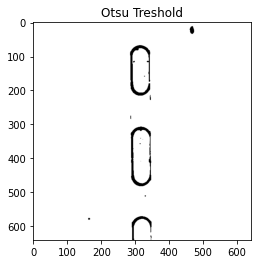

In [3]:
#read image
img_example = cv2.imread('data/image/10000.jpg')

# Image - Gray
img_gray=cv2.cvtColor(img_example, cv2.COLOR_BGR2GRAY)

# Diff Blur
diff_gray_blur = cv2.GaussianBlur(img_gray,(5,5),0)

# find otsu's threshold value with OpenCV function
ret, img_tresh = cv2.threshold(diff_gray_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
previewImg("Otsu Treshold",img_tresh,True)

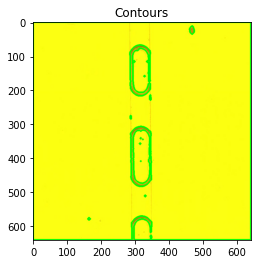

In [4]:
arr_cnt, hierarchy = cv2.findContours(img_tresh, 
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE)
# let's copy the example image, so we don't paint over it
img_with_allcontours=img_example.copy()
cv2.drawContours(img_with_allcontours, arr_cnt, -1, (0,255,0), 3)
# cv2.imwrite('result2D/contour.jpg', img_with_allcontours[ 20: 660, 520: 1260])
previewImg('Contours',img_with_allcontours)

In [5]:
# Just in case, we need to make sure we 'weed out' any contour noise that might generate as images have variations.

# get the dimensions of the image
height, width, channels = img_example.shape

# shorten the variable names
w=width
h=height

validcontours=[]
contour_index=-1

# iterate through each contour found
for i in arr_cnt:

    contour_index=contour_index+1
    ca=cv2.contourArea(i)

    # Calculate W/H Ratio of image
    x,y,w,h = cv2.boundingRect(i)
    # aspect_ratio = float(w)/h

    # Flag as edge_noise if the object is at a Corner
    # Contours at the edges of the image are most likely not valid contours
    # edge_noise=False
    # # if contour starts at x=0 then it's on th edge
    # if x==0:
    #     edge_noise=True
    # if y==0:
    #     edge_noise=True
    # # if the contour x value + its contour width exceeds image width, it is on an edge
    # if (x+w)==width:
    #     edge_noise=True
    # if (y+h)==height:
    #     edge_noise=True
            
    # DISCARD noise with measure by area (1x1 round plate dimensions is 1300)
    # if by any chance a contour is drawn on one pixel, this catches it.
    if ca>1000:

        # DISCARD as noise if W/H ratio > 7 to 1 (1x6 plate is 700px to 100px)
        # the conveyor belt has a join line that sometimes is detected as a contour, this ignores it based on w/h ratio
        # if aspect_ratio<=6:
            
            # DISCARD if at the Edge
            # if edge_noise==False:
        validcontours.append(contour_index)

# copy the original picture
img_withcontours=img_example.copy()
                
# call out if more than 1 valid contour is found
if len(validcontours)>1:
    print("There is more than 1 object in the picture")
else:
    if len(validcontours)==1:
        print("One object detected")
    else:
        print("No objects detected")
        # FYI: code below will most likely error out as it tries to iterate on an array
    
# it might be possible we have more than 1 validcontour, iterating through them here
# if there is zero contours, this most likely will error out
# for i in validcontours:                           
#     cv2.drawContours(img_withcontours, arr_cnt,validcontours[i], (0,255,0), 3)
#     previewImg('Contours',img_withcontours)

There is more than 1 object in the picture


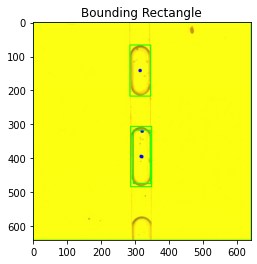

In [6]:
# Display a Bounding Rectangle
img_withrectangle=img_example.copy()
count = 0

#ma trận tâm các vật
center = np.array([[0,0]])
for i in validcontours:
    center_obj = []
    x,y,w,h = cv2.boundingRect(arr_cnt[i])
    center_obj = [x+w/2, y+h/2]
    # center = [center, [x+w/2, y+h/2]]
    center = np.append(center, [center_obj], axis=0)
    cv2.rectangle(img_withrectangle,(x,y),(x+w,y+h),(0,255,0),2)
    # previewImg('Bounding Rectangle',img_withrectangle)
    #Draw center rectangle
    img_withrectangle = cv2.circle(img_withrectangle, (int(x+w/2), int(y+h/2)), radius=0, color=(255, 0, 0), thickness=10)

    #ID object
    # image = cv2.putText(img_withrectangle, str(count), (x + 10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, 
    #              (0, 0, 255), 2, cv2.LINE_AA, False)

    

    count +=1

  
previewImg('Bounding Rectangle',img_withrectangle)